In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Data Preprocessing

In [2]:
education = pd.read_excel('files/education_level.xlsx', sheet_name = 1)
education.head()

,Kod,Nazwa,Miesiące,Płeć,Poziomy wykształcenia,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,ogółem,2021,1090365,osoba,
1,0,POLSKA,styczeń,ogółem,ogółem,2022,927112,osoba,
2,0,POLSKA,styczeń,ogółem,ogółem,2023,857589,osoba,
3,0,POLSKA,styczeń,ogółem,ogółem,2024,837063,osoba,
4,0,POLSKA,styczeń,ogółem,wyższe,2021,160250,osoba,


In [3]:
for col in education:
    print(f"{col}:\t\t{education[col].unique()}")

Kod:		[0]
Nazwa:		['POLSKA']
Miesiące:		['styczeń' 'luty' 'marzec' 'kwiecień' 'maj' 'czerwiec' 'lipiec' 'sierpień'
 'wrzesień' 'październik' 'listopad' 'grudzień']
Płeć:		['ogółem' 'kobiety' 'mężczyźni']
Poziomy wykształcenia:		['ogółem' 'wyższe' 'policealne oraz średnie zawodowe'
 'średnie ogólnokształcące' 'zasadnicze zawodowe/branżowe'
 'gimnazjalne, podstawowe i niepełne podstawowe']
Rok:		[2021 2022 2023 2024]
Wartosc:		[1090365 927112 857589 837063 160250 132273 121904 120810 241462 205016
 191309 187450 132212 111434 103494 103497 270482 229272 214887 207581
 285959 249117 225995 217725 583351 495959 458269 437618 109762 90838
 83339 80897 144713 122787 114030 109065 86648 73462 67976 66423 116620
 98825 91730 86590 125608 110047 101194 94643 507014 431153 399320 399445
 50488 41435 38565 39913 96749 82229 77279 78385 45564 37972 35518 37074
 153862 130447 123157 120991 160351 139070 124801 123082 1099538 921760
 864781 '-' 131613 122400 242308 203061 192289 133937 111179 105024

In [4]:
education = education[education['Atrybut'] != 'n']
education.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)

In [5]:
education.head()

,Miesiące,Płeć,Poziomy wykształcenia,Rok,Wartosc
0,styczeń,ogółem,ogółem,2021,1090365
1,styczeń,ogółem,ogółem,2022,927112
2,styczeń,ogółem,ogółem,2023,857589
3,styczeń,ogółem,ogółem,2024,837063
4,styczeń,ogółem,wyższe,2021,160250


In [6]:
education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 862
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Miesiące               666 non-null    object
 1   Płeć                   666 non-null    object
 2   Poziomy wykształcenia  666 non-null    object
 3   Rok                    666 non-null    int64 
 4   Wartosc                666 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.2+ KB


In [7]:
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [8]:
education['month'] = education['Miesiące'].map(month_mapping)
education.rename(columns = {'Rok' : 'year'}, inplace = True)
education['Data'] = pd.to_datetime(education[['year', 'month']].assign(DAY=1))

education['Wartosc'] = education['Wartosc'].astype(int)

In [10]:
education.head()

,Miesiące,Płeć,Poziomy wykształcenia,year,Wartosc,month,Data
0,styczeń,ogółem,ogółem,2021,1090365,1,2021-01-01
1,styczeń,ogółem,ogółem,2022,927112,1,2022-01-01
2,styczeń,ogółem,ogółem,2023,857589,1,2023-01-01
3,styczeń,ogółem,ogółem,2024,837063,1,2024-01-01
4,styczeń,ogółem,wyższe,2021,160250,1,2021-01-01


In [25]:
education.groupby(['year', 'Płeć', 'Poziomy wykształcenia']).Wartosc.agg(["sum"])

sum
year Płeć    Poziomy wykształcenia                                 
2021 kobiety gimnazjalne, podstawowe i niepełne podstawowe  1414774
             ogółem                                         6416099
             policealne oraz średnie zawodowe               1578604
             wyższe                                         1192494
             zasadnicze zawodowe/branżowe                   1273100
...                                                             ...
2024 ogółem  ogółem                                          837063
             policealne oraz średnie zawodowe                187450
             wyższe                                          120810
             zasadnicze zawodowe/branżowe                    207581
             średnie ogólnokształcące                        103497

[72 rows x 1 columns]

<Figure size 1200x800 with 0 Axes>

## Exploratory Data Analysis (EDA)

<Axes: xlabel='Data', ylabel='Wartosc'>

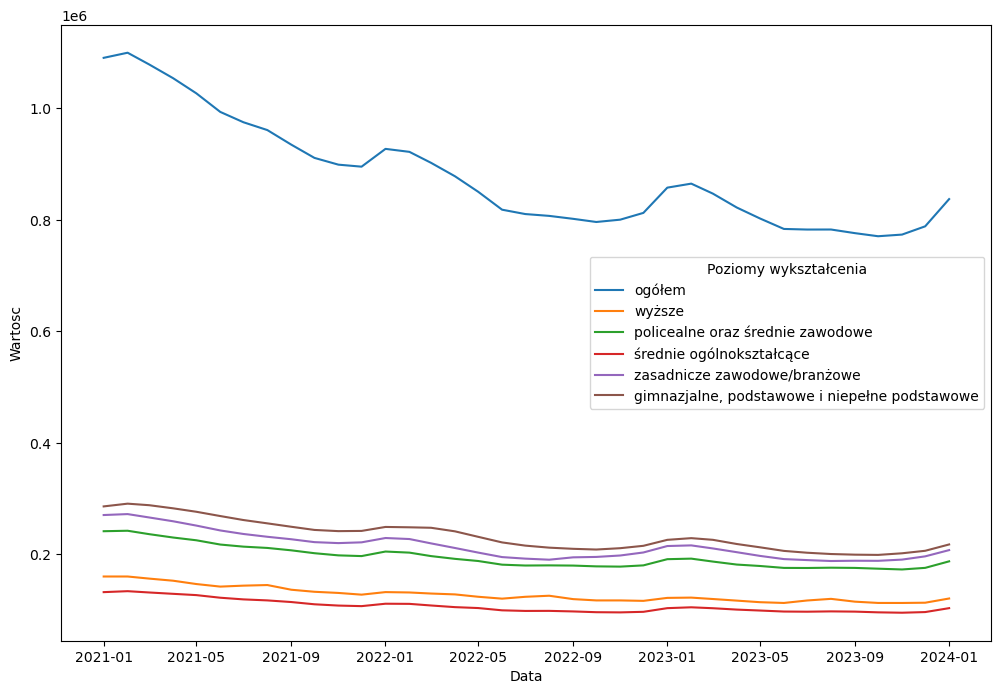

In [16]:
fig = plt.figure(figsize = [12,8])

sns.lineplot(
    x = "Data", 
    y = "Wartosc",
    hue = "Poziomy wykształcenia",
    data = education[education['Płeć'] == "ogółem"] 
)

In [18]:
education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 862
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Miesiące               666 non-null    object        
 1   Płeć                   666 non-null    object        
 2   Poziomy wykształcenia  666 non-null    object        
 3   year                   666 non-null    int64         
 4   Wartosc                666 non-null    int32         
 5   month                  666 non-null    int64         
 6   Data                   666 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 39.0+ KB


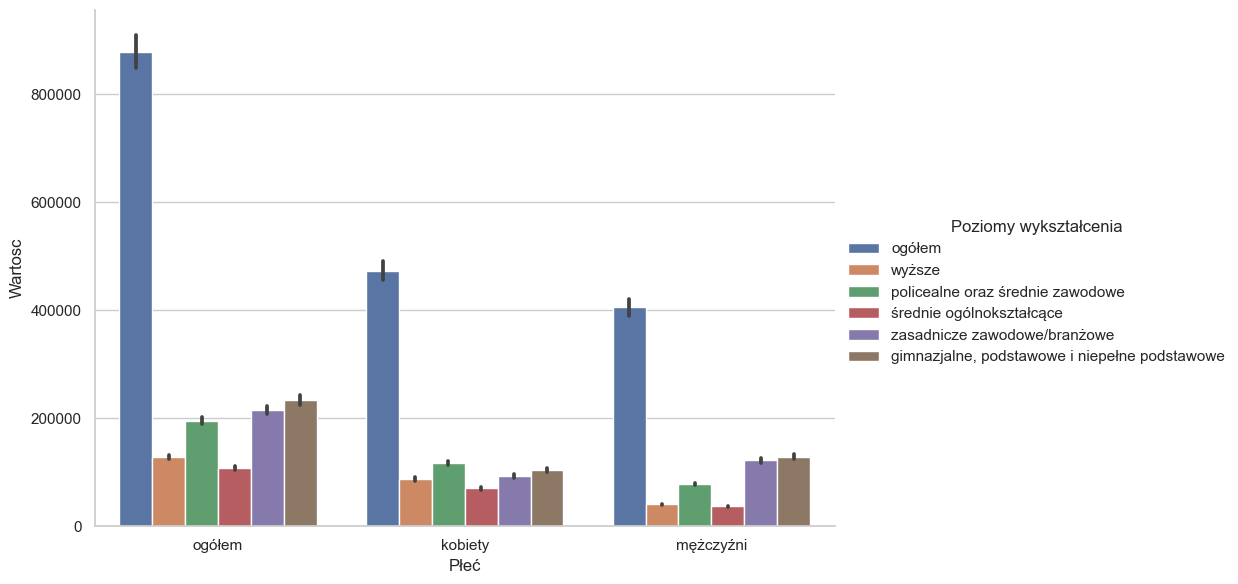

In [41]:
sns.set(style="whitegrid")
sns.catplot(data=education, x="Płeć", y="Wartosc", hue="Poziomy wykształcenia", kind="bar", height=6, aspect=1.5)


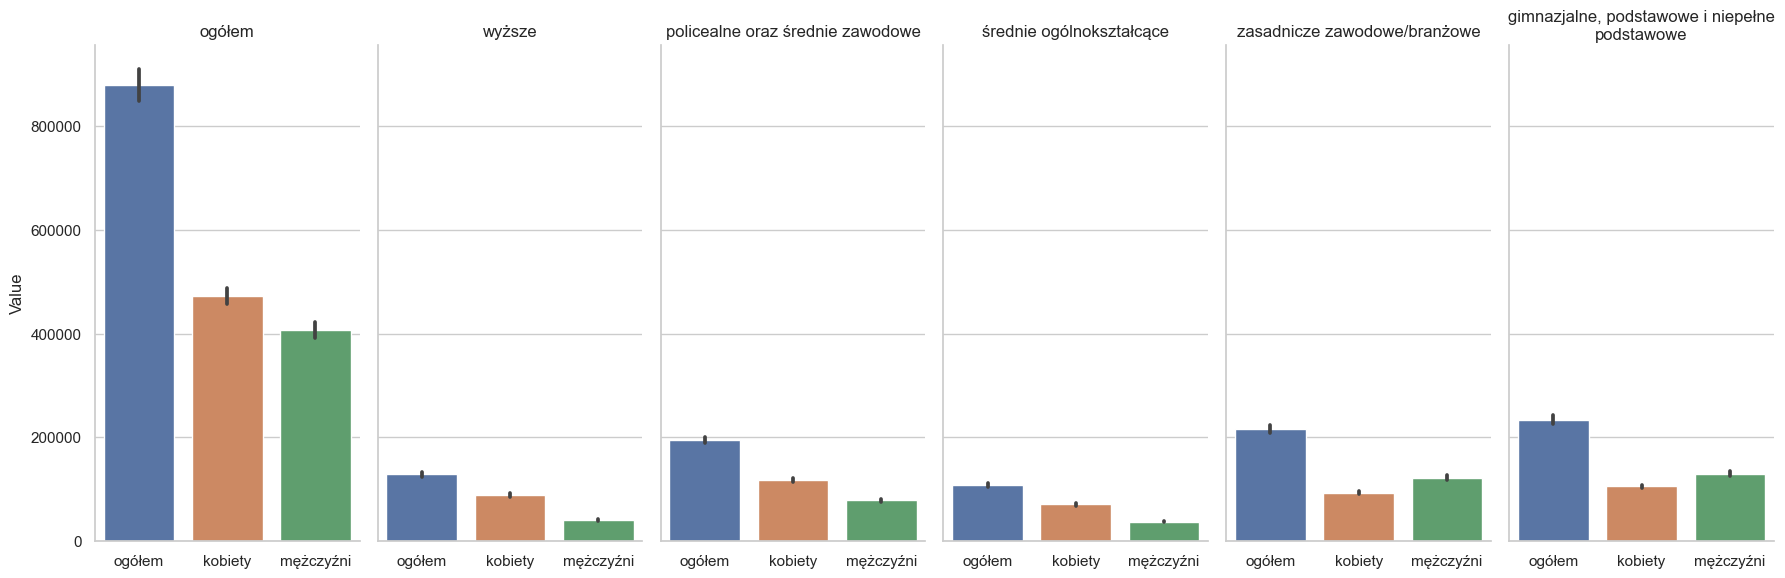

In [117]:
from textwrap import wrap
import re

g = sns.catplot(
    data=education, x="Płeć", y="Wartosc", col="Poziomy wykształcenia",
    kind="bar", height=6, aspect=0.5
)
g.set_axis_labels("", "Value")
    
g.set_titles("{col_name}", wrap=True)
# g.set(ylim=(0, 1))
# g.despine(left=True)